In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
appearences = pd.read_csv("/kaggle/input/player-scores/appearances.csv")
appearences

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685164,4547682_747487,4547682,747487,865,865,2025-02-20,Valdemar Byskov,EL,0,0,0,0,15
1685165,4547682_881116,4547682,881116,865,865,2025-02-20,Darío Osorio,EL,0,0,1,0,74
1685166,4547682_907813,4547682,907813,681,681,2025-02-20,Pablo Marín,EL,0,0,0,0,42
1685167,4547682_929090,4547682,929090,865,865,2025-02-20,Franculino,EL,0,0,0,0,16


In [3]:
clubs = pd.read_csv("/kaggle/input/player-scores/clubs.csv")
clubs

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,26.4,15,50.0,8,Beşiktaş Park,42445,€-25.26m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.2,18,69.2,17,Olimpico di Roma,70634,€-76.90m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,30,25.4,21,70.0,19,Tottenham Hotspur Stadium,62850,€-120.05m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,724,fc-volendam,FC Volendam,NL1,NaN,25,23.4,6,24.0,2,Kras Stadion,7384,+€800k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
435,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,26,27.5,14,53.8,20,Gewiss Stadium,24950,+€11.45m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
436,85465,karpaty-lviv-2020-,FK Karpaty Lviv,UKR1,NaN,30,25.3,8,26.7,2,Ukraina,28051,€-3.38m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv-2...
437,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,27,26.0,17,63.0,3,Estádio C. J. de Almeida Freitas,6150,+€2.60m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


In [4]:
games = pd.read_csv("/kaggle/input/player-scores/games.csv")
games

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,...,Veltins-Arena,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,...,EINTRACHT-Stadion,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,...,SIGNAL IDUNA PARK,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73272,3714107,UCOL,2021,intermediate stage 1st leg,2022-02-17,383.0,119.0,1.0,0.0,NaN,...,Philips Stadion,12000.0,Glenn Nyberg,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,1:0,international_cup
73273,3143618,FAC,2018,Third Round Replay,2019-01-15,512.0,3054.0,2.0,3.0,NaN,...,bet365 Stadium,10261.0,Geoff Eltringham,https://www.transfermarkt.co.uk/spielbericht/i...,4-4-2 Diamond,4-2-3-1,Stoke City,NaN,2:3,domestic_cup
73274,4233201,SFA,2023,Fourth Round,2024-01-20,987.0,3020.0,3.0,1.0,NaN,...,Fir Park,4119.0,John Beaton,https://www.transfermarkt.co.uk/spielbericht/i...,5-3-2,4-2-3-1,Motherwell Football Club,NaN,3:1,domestic_cup
73275,2469213,ELQ,2014,Second Round 1st leg,2014-07-17,987.0,21875.0,2.0,2.0,NaN,...,Fir Park,6700.0,Michael Johansen,https://www.transfermarkt.co.uk/spielbericht/i...,4-5-1 flat,4-3-3 Defending,Motherwell Football Club,NaN,2:2,international_cup


In [5]:
player_valuations = pd.read_csv("/kaggle/input/player-scores/player_valuations.csv")
player_valuations

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
494689,815014,2025-01-09,25000,10484,TR1
494690,888517,2025-01-09,250000,5724,DK1
494691,1225269,2025-01-09,50000,7160,TR1
494692,936874,2025-02-06,1000000,631,GB1


In [6]:
players = pd.read_csv("/kaggle/input/player-scores/players.csv")
players

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,1364960,Darryl,Nkulikiyimana,Darryl Nkulikiyimana,2024,9010,darryl-nkulikiyimana,NaN,NaN,Belgium,...,left,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/darryl-nkuliki...,BE1,FC Verbroedering Denderhoutem Denderleeuw Eend...,NaN,NaN
32573,1365020,Afonso,Assis,Afonso Assis,2024,979,afonso-assis,NaN,NaN,Portugal,...,left,NaN,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/afonso-assis/p...,PO1,Moreirense Futebol Clube,NaN,NaN
32574,1367128,Abdoulaye,Yoro,Abdoulaye Yoro,2024,6890,abdoulaye-yoro,NaN,NaN,Cote d'Ivoire,...,left,175.0,2027-06-30 00:00:00,Tamegnon Consulting,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/abdoulaye-yoro...,TR1,İstanbul Başakşehir Futbol Kulübü,NaN,NaN
32575,1369057,Yusuf,Kurt,Yusuf Kurt,2024,11282,yusuf-kurt,Türkiye,Batman,Türkiye,...,left,186.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-kurt/pro...,TR1,Alanyaspor,NaN,NaN


In [7]:
full_players_info = players.merge(appearences, on='player_id')

In [8]:
full_players_info = full_players_info.merge(games[['game_id','season']], on='game_id') # Combining

In [9]:
full_players_info = full_players_info[['name', 'country_of_citizenship', 'date_of_birth', 'market_value_in_eur', 'yellow_cards', 'red_cards', 'goals'
                                      , 'assists', 'minutes_played', 'season']]

In [10]:
full_players_info = full_players_info.loc[full_players_info['season'].isin([2022, 2023,2024, 2025])]
full_players_info = full_players_info.drop('season',axis=1)

In [11]:
full_players_info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,country_of_citizenship,date_of_birth,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
9912,James Milner,England,1986-01-04 00:00:00,1000000.0,0,0,0,0,16
9913,James Milner,England,1986-01-04 00:00:00,1000000.0,0,0,0,0,31
9914,James Milner,England,1986-01-04 00:00:00,1000000.0,0,0,0,1,63
9915,James Milner,England,1986-01-04 00:00:00,1000000.0,0,0,0,0,73
9916,James Milner,England,1986-01-04 00:00:00,1000000.0,0,0,0,0,21
...,...,...,...,...,...,...,...,...,...
1685158,Hakim Sulemana,Ghana,2005-02-09 00:00:00,50000.0,0,0,0,0,12
1685159,Hakim Sulemana,Ghana,2005-02-09 00:00:00,50000.0,0,0,0,0,3
1685160,Aristide Zossou,Cote d'Ivoire,2005-06-14 00:00:00,NaN,0,0,0,0,5
1685161,Aristide Zossou,Cote d'Ivoire,2005-06-14 00:00:00,NaN,0,0,0,0,5


In [12]:
full_players_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382066 entries, 9912 to 1685162
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   name                    382066 non-null  object 
 1   country_of_citizenship  378609 non-null  object 
 2   date_of_birth           382031 non-null  object 
 3   market_value_in_eur     381677 non-null  float64
 4   yellow_cards            382066 non-null  int64  
 5   red_cards               382066 non-null  int64  
 6   goals                   382066 non-null  int64  
 7   assists                 382066 non-null  int64  
 8   minutes_played          382066 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 29.1+ MB


In [13]:
# Convert `date_of_birth` to datetime
full_players_info["date_of_birth"] = pd.to_datetime(full_players_info["date_of_birth"], errors="coerce")

# Convert `country_of_citizenship` to string (in case of mixed types)
full_players_info["country_of_citizenship"] = full_players_info["country_of_citizenship"].astype("string")

# Convert `name` to string type
full_players_info["name"] = full_players_info["name"].astype("string")

In [14]:
print(full_players_info.isna().sum())
full_players_info= full_players_info.dropna()

name                         0
country_of_citizenship    3457
date_of_birth               35
market_value_in_eur        389
yellow_cards                 0
red_cards                    0
goals                        0
assists                      0
minutes_played               0
dtype: int64


In [15]:
# Calculate age in years
today = datetime.today()
full_players_info['age'] = (today - full_players_info['date_of_birth']).dt.days / 365.25
full_players_info['age'] = full_players_info['age'].round().astype(int)

# Drop the 'date_of_birth' column because we already transformed it into age
full_players_info = full_players_info.drop(columns=['date_of_birth'])

<ipython-input-15-3fb067720173>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_players_info['age'] = (today - full_players_info['date_of_birth']).dt.days / 365.25
<ipython-input-15-3fb067720173>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_players_info['age'] = full_players_info['age'].round().astype(int)


In [16]:
full_players_info = full_players_info.groupby(
    ["name", "country_of_citizenship", "market_value_in_eur", "age"], 
    as_index=False
).agg({
    "yellow_cards": "sum",
    "red_cards": "sum",
    "goals": "sum",
    "assists": "sum",
    "minutes_played": "sum",
    "age": "first"
})

In [17]:
print(full_players_info.duplicated().sum())
full_players_info = full_players_info.drop_duplicates()

0


In [18]:
full_players_info = full_players_info.sort_values(by="market_value_in_eur", ascending=False)
full_players_info

,name,country_of_citizenship,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played,age
2920,Erling Haaland,Norway,200000000.0,9,0,116,17,10846,25
9763,Vinicius Junior,Brazil,200000000.0,38,2,63,44,10442,25
4985,Jude Bellingham,England,180000000.0,28,2,48,30,9970,22
5497,Lamine Yamal,Spain,180000000.0,8,0,18,24,5563,18
5464,Kylian Mbappé,France,160000000.0,14,0,99,19,9846,26
...,...,...,...,...,...,...,...,...,...
737,Andriy Stolyarchuk,Ukraine,10000.0,0,0,1,0,45,21
3398,Gennadiy Synchuk,Ukraine,10000.0,0,0,0,1,157,19
9843,Vladyslav Klymak,Ukraine,10000.0,0,0,0,0,28,21
3680,Günes Güventürk,Turkey,10000.0,0,0,0,0,4,20


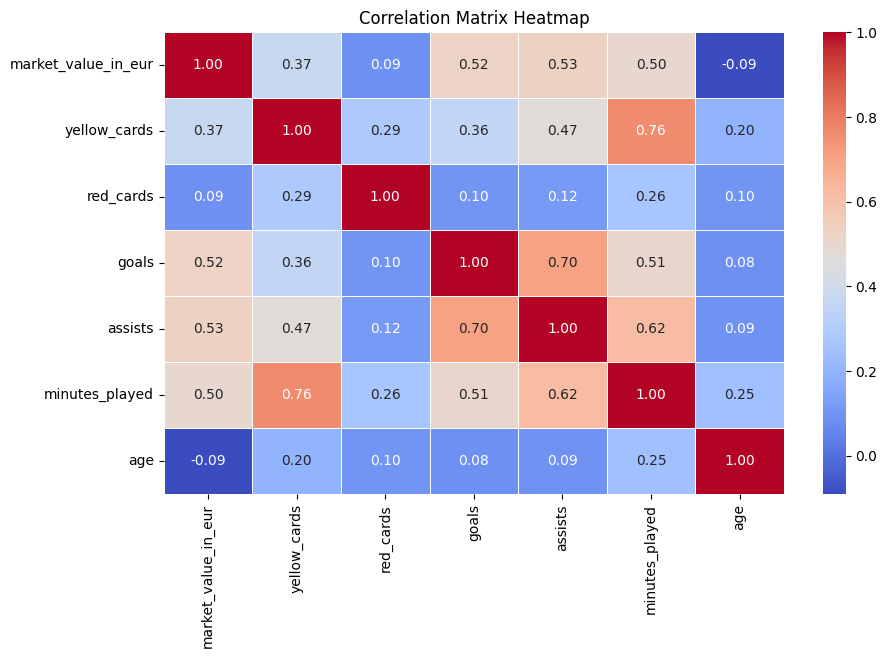

In [19]:
# Selecting only numerical columns
numerical_cols = full_players_info.select_dtypes(include=["number"])

# Computing the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

In [20]:
full_players_info.nlargest(10, "goals")[["name", "country_of_citizenship", "goals"]]

,name,country_of_citizenship,goals
2920,Erling Haaland,Norway,116
3735,Harry Kane,England,105
5464,Kylian Mbappé,France,99
8280,Robert Lewandowski,Poland,91
6929,Mohamed Salah,Egypt,83
5529,Lautaro Martínez,Argentina,70
5923,Luuk de Jong,Netherlands,70
9740,Viktor Gyökeres,Sweden,69
9725,Victor Osimhen,Nigeria,68
8694,Santiago Gimenez,Mexico,68


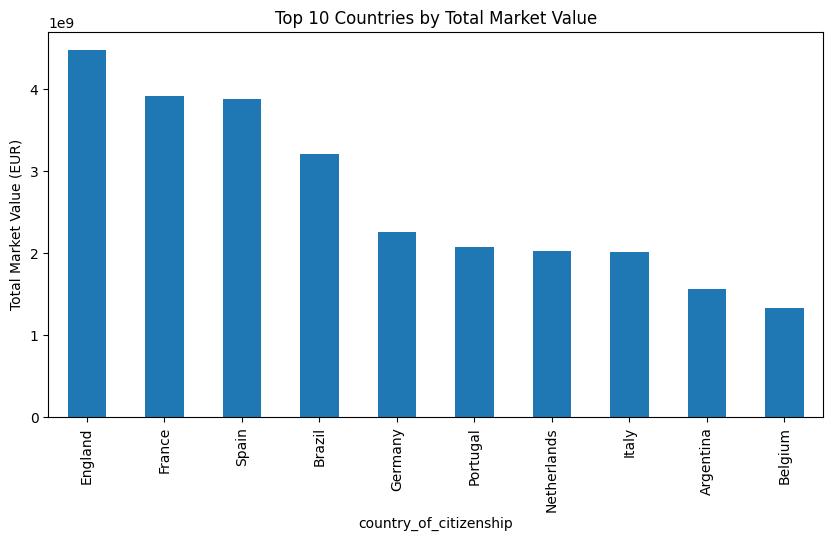

In [21]:
country_value = full_players_info.groupby("country_of_citizenship")["market_value_in_eur"].sum().nlargest(10)
country_value.plot(kind="bar", figsize=(10,5), title="Top 10 Countries by Total Market Value")
plt.ylabel("Total Market Value (EUR)")
plt.show()

In [22]:
# Selecting relevant numerical features
numerical_cols = ["market_value_in_eur", "yellow_cards", "red_cards", "goals", "assists", "minutes_played", "age"]

# Filtering the dataset to include only numerical columns
df_numeric = full_players_info[numerical_cols]

# Standardizing the data (mean=0, variance=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


Fitting KMeans with k=1
Inertia for k=1: 72744.00000000003

Fitting KMeans with k=2
Inertia for k=2: 51004.03889682377

Fitting KMeans with k=3
Inertia for k=3: 42648.6721212768

Fitting KMeans with k=4
Inertia for k=4: 36344.22231134824

Fitting KMeans with k=5
Inertia for k=5: 31111.840551288256

Fitting KMeans with k=6
Inertia for k=6: 28388.88882433472

Fitting KMeans with k=7
Inertia for k=7: 26355.357322865006

Fitting KMeans with k=8
Inertia for k=8: 24710.97793247791

Fitting KMeans with k=9
Inertia for k=9: 23096.536219887654


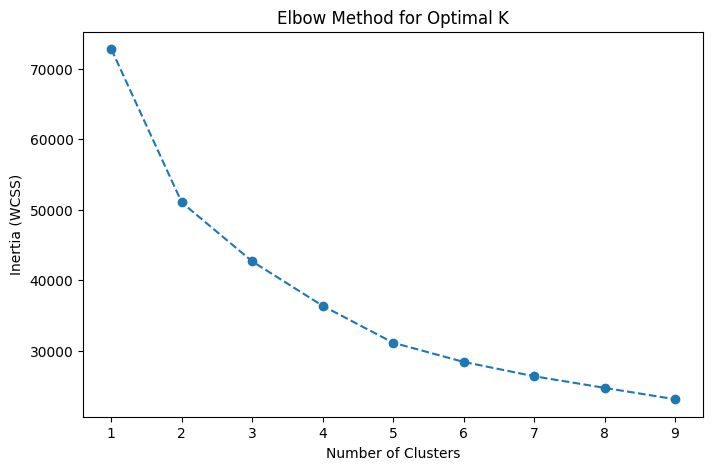

In [23]:
#Finding optimal clusters using Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    print(f"\nFitting KMeans with k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++') 
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f"Inertia for k={k}: {kmeans.inertia_}")

# Plotting the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [24]:
# Choosing K=6 with verbose output
print("\nFitting final KMeans model")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)
full_players_info["Cluster"] = clusters

# Distribution and detailed cluster analysis
print("\nCluster Distribution:")
cluster_dist = full_players_info["Cluster"].value_counts()
print(cluster_dist)
print("\nPercentage Distribution:")
print((cluster_dist / len(full_players_info) * 100).round(2), "%")


Fitting final KMeans model

Cluster Distribution:
Cluster
0    4284
3    2645
4    1990
1    1129
2     344
Name: count, dtype: int64

Percentage Distribution:
Cluster
0    41.22
3    25.45
4    19.15
1    10.86
2     3.31
Name: count, dtype: float64 %


In [25]:
# Calculate key metrics for each cluster
cluster_profiles = full_players_info.groupby('Cluster').agg({
    'market_value_in_eur': ['mean', 'median'],
    'goals': 'mean',
    'assists': 'mean',
    'minutes_played': 'mean',
    'age': 'mean',
    'name': 'count'  # Number of players in cluster
}).round(2)

In [26]:
# Print cluster sizes and characteristics
print("Cluster Characteristics:\n")
for cluster in range(5):
    print(f"\nCluster {cluster} Analysis:")
    print(f"Number of players: {cluster_profiles.loc[cluster, ('name', 'count')]}")
    print(f"Average age: {cluster_profiles.loc[cluster, ('age', 'mean')]:.1f} years")
    print(f"Average market value: €{cluster_profiles.loc[cluster, ('market_value_in_eur', 'mean')]:,.2f}")
    print(f"Average goals: {cluster_profiles.loc[cluster, ('goals', 'mean')]:.1f}")
    print(f"Average assists: {cluster_profiles.loc[cluster, ('assists', 'mean')]:.1f}")
    print(f"Average minutes: {cluster_profiles.loc[cluster, ('minutes_played', 'mean')]:.1f}")
    
    # Print top 3 representative players
    print("\nTop Representatives:")
    top_players = full_players_info[full_players_info['Cluster'] == cluster].nlargest(3, 'market_value_in_eur')[
        ['name', 'market_value_in_eur', 'goals', 'assists', 'age']
    ]
    print(top_players.to_string())
    print("-" * 80)

Cluster Characteristics:


Cluster 0 Analysis:
Number of players: 4284
Average age: 23.1 years
Average market value: €1,648,788.52
Average goals: 1.0
Average assists: 0.8
Average minutes: 847.5

Top Representatives:
                 name  market_value_in_eur  goals  assists  age
2836          Endrick           40000000.0      5        1   19
9418  Tino Livramento           35000000.0      1        1   22
109      Adam Wharton           32000000.0      0        4   21
--------------------------------------------------------------------------------

Cluster 1 Analysis:
Number of players: 1129
Average age: 28.2 years
Average market value: €4,629,450.84
Average goals: 3.9
Average assists: 3.3
Average minutes: 3861.0

Top Representatives:
                 name  market_value_in_eur  goals  assists  age
8412    Ronald Araujo           55000000.0      3        5   26
7709    Pablo Barrios           50000000.0      3        5   22
2250  Dayot Upamecano           50000000.0      4        2   26


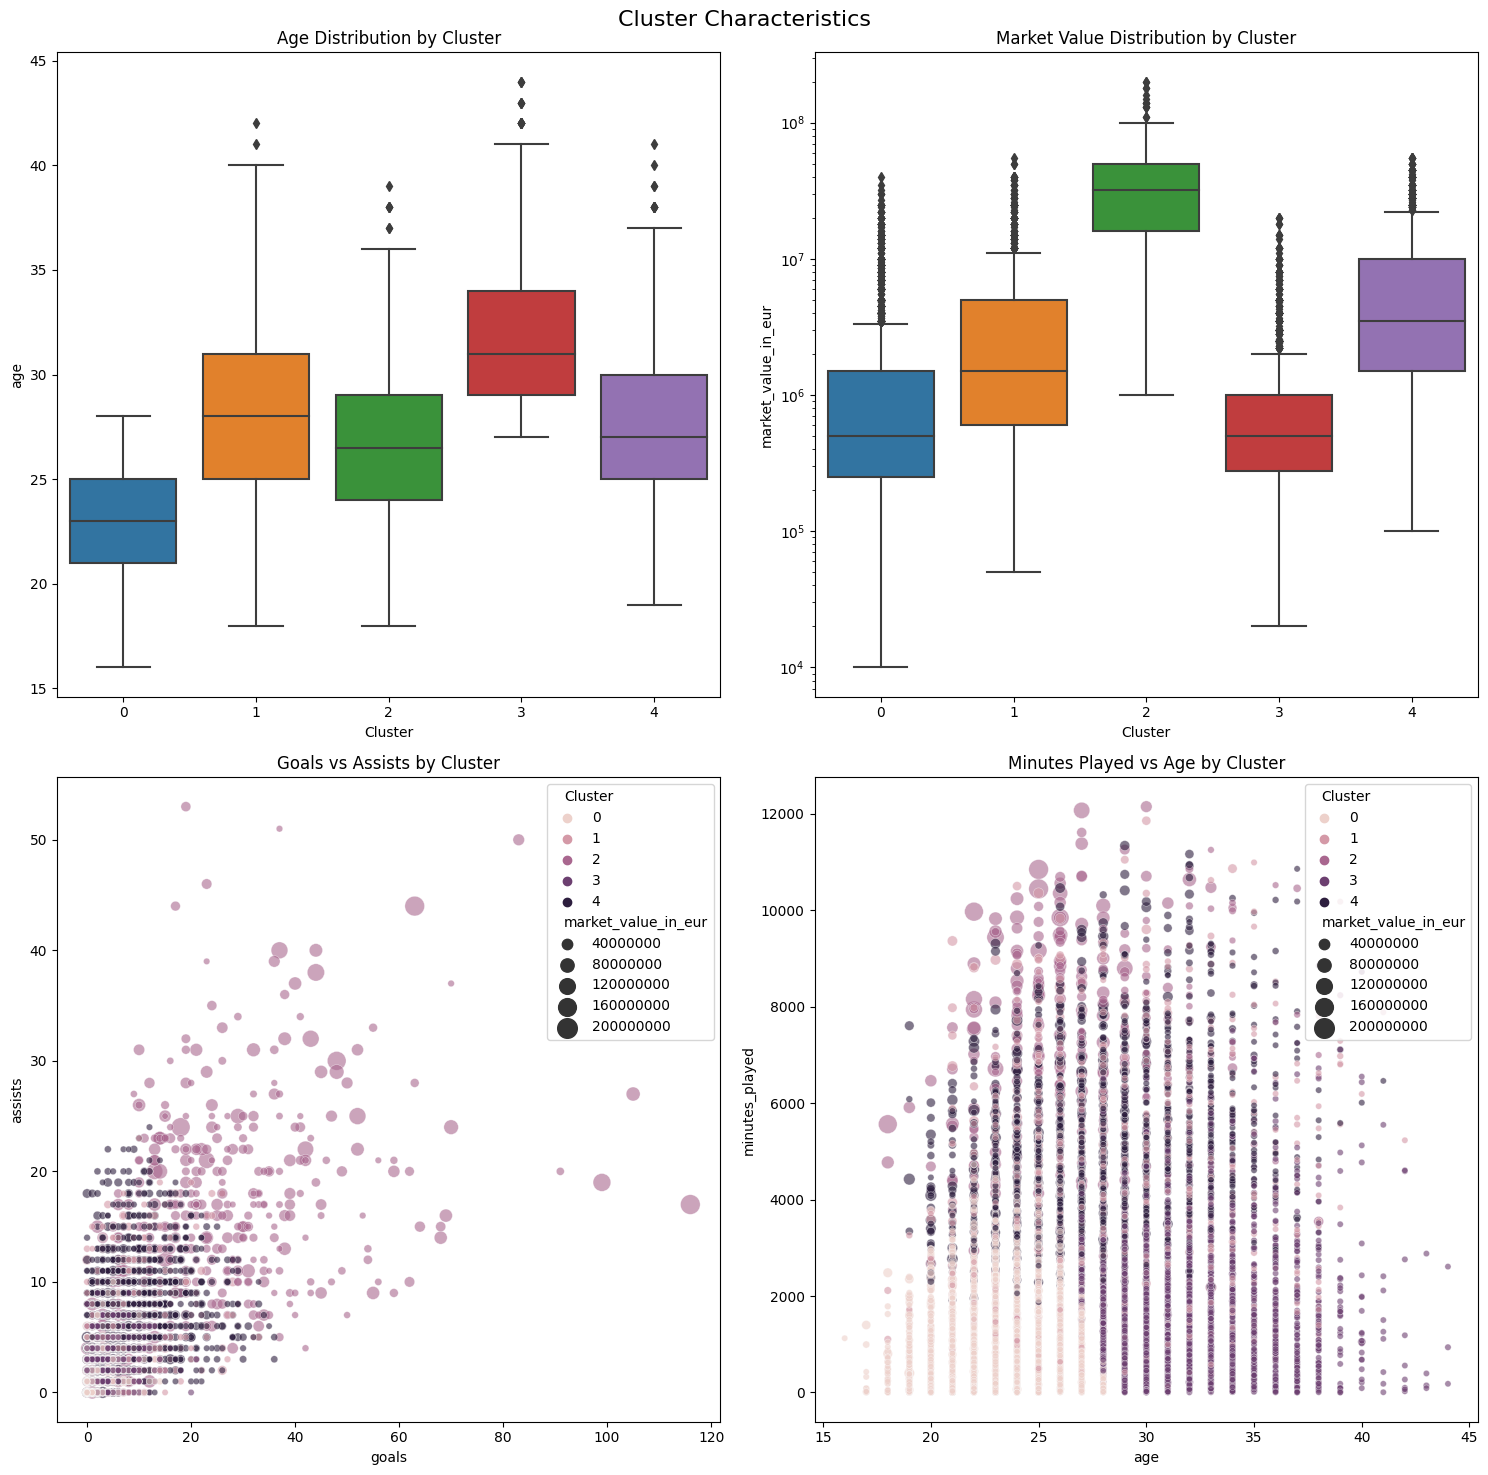

In [27]:
# Visualize key characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Cluster Characteristics', fontsize=16)

# Age distribution
sns.boxplot(data=full_players_info, x='Cluster', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Cluster')

# Market value distribution (log scale)
sns.boxplot(data=full_players_info, x='Cluster', y='market_value_in_eur', ax=axes[0,1])
axes[0,1].set_yscale('log')
axes[0,1].set_title('Market Value Distribution by Cluster')

# Goals vs Assists
sns.scatterplot(data=full_players_info, x='goals', y='assists', 
                hue='Cluster', size='market_value_in_eur',
                sizes=(20, 200), alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Goals vs Assists by Cluster')

# Minutes played vs Age
sns.scatterplot(data=full_players_info, x='age', y='minutes_played',
                hue='Cluster', size='market_value_in_eur',
                sizes=(20, 200), alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Minutes Played vs Age by Cluster')

plt.tight_layout()
plt.show()

In [28]:
# XGBoost Model Training with enhanced verbosity
features = ["yellow_cards", "red_cards", "goals", "assists", "minutes_played", "age"]
target = "market_value_in_eur"
X = full_players_info[features]
y = full_players_info[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

In [29]:
xgb_model = xgb.XGBRegressor(
    tree_method='gpu_hist',
    random_state=42,
    verbose=2,
    early_stopping_rounds=10
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

print("\nStarting GridSearchCV...")
grid_search.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=2
)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Negative because of scoring metric

best_xgb = xgb.XGBRegressor(
    **grid_search.best_params_,
    tree_method='gpu_hist',
    verbose=2,
    early_stopping_rounds=5,
    random_state=42
)


Starting GridSearchCV...
Fitting 3 folds for each of 324 candidates, totalling 972 fits
[0]	validation_0-rmse:11524160.18942
[2]	validation_0-rmse:11190080.46180
[4]	validation_0-rmse:10815841.92451
[6]	validation_0-rmse:10522157.12005
[8]	validation_0-rmse:10260247.39492
[10]	validation_0-rmse:10056595.63412
[12]	validation_0-rmse:9851661.52113
[14]	validation_0-rmse:9681758.44412
[16]	validation_0-rmse:9524192.71489
[18]	validation_0-rmse:9381572.55327
[20]	validation_0-rmse:9258962.86457
[22]	validation_0-rmse:9158103.53065
[24]	validation_0-rmse:9058423.58641
[26]	validation_0-rmse:8952294.68318
[28]	validation_0-rmse:8832681.61600
[30]	validation_0-rmse:8777010.42690
[32]	validation_0-rmse:8724255.46470
[34]	validation_0-rmse:8660804.85395
[36]	validation_0-rmse:8590163.31531
[38]	validation_0-rmse:8533858.17724


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:51:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:51:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[40]	validation_0-rmse:8489606.42022
[42]	validation_0-rmse:8432528.63722
[44]	validation_0-rmse:8380822.94773
[46]	validation_0-rmse:8355134.84501
[48]	validation_0-rmse:8348314.36324
[50]	validation_0-rmse:8307575.41046
[52]	validation_0-rmse:8272370.18834
[54]	validation_0-rmse:8218119.92443
[56]	validation_0-rmse:8186063.85331
[58]	validation_0-rmse:8168470.61992
[60]	validation_0-rmse:8156844.50418
[62]	validation_0-rmse:8141568.75960
[64]	validation_0-rmse:8135134.44841
[66]	validation_0-rmse:8115695.62854
[68]	validation_0-rmse:8097934.52844
[70]	validation_0-rmse:8078969.70279
[72]	validation_0-rmse:8063994.58276
[74]	validation_0-rmse:8061315.90314
[76]	validation_0-rmse:8048008.89147
[78]	validation_0-rmse:8030518.30441
[80]	validation_0-rmse:8027159.80926
[82]	validation_0-rmse:8014375.25719
[84]	validation_0-rmse:8005803.75194
[86]	validation_0-rmse:7991102.83167
[88]	validation_0-rmse:7983447.59411
[90]	validation_0-rmse:7975567.31510
[92]	validation_0-rmse:7967954.14784
[

In [30]:
print("\nTraining final model with best parameters...")
best_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=2
)

y_pred = best_xgb.predict(X_test)

# Detailed evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Training final model with best parameters...
[0]	validation_0-rmse:9914085.16942	validation_1-rmse:11524160.18942
[2]	validation_0-rmse:9509901.92130	validation_1-rmse:11190080.46180
[4]	validation_0-rmse:9150870.22322	validation_1-rmse:10815841.92451
[6]	validation_0-rmse:8817029.36577	validation_1-rmse:10522157.12005
[8]	validation_0-rmse:8534749.25917	validation_1-rmse:10260247.39492
[10]	validation_0-rmse:8275622.40121	validation_1-rmse:10056595.63412
[12]	validation_0-rmse:8059509.06794	validation_1-rmse:9851661.52113
[14]	validation_0-rmse:7860834.19457	validation_1-rmse:9681758.44412
[16]	validation_0-rmse:7681118.89819	validation_1-rmse:9524192.71489
[18]	validation_0-rmse:7536976.37528	validation_1-rmse:9381572.55327
[20]	validation_0-rmse:7379654.77536	validation_1-rmse:9258962.86457
[22]	validation_0-rmse:7260425.35550	validation_1-rmse:9158103.53065
[24]	validation_0-rmse:7122920.74232	validation_1-rmse:9058423.58641
[26]	validation_0-rmse:7005266.28778	validation_1-rmse:8

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:51:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:51:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[110]	validation_0-rmse:5762475.73268	validation_1-rmse:7896614.37318
[112]	validation_0-rmse:5755991.59398	validation_1-rmse:7881237.32588
[114]	validation_0-rmse:5748658.90215	validation_1-rmse:7874577.81700
[116]	validation_0-rmse:5737387.02502	validation_1-rmse:7882074.87257
[118]	validation_0-rmse:5728735.13294	validation_1-rmse:7858996.22786
[120]	validation_0-rmse:5723265.06052	validation_1-rmse:7861919.55138
[122]	validation_0-rmse:5712063.16897	validation_1-rmse:7854477.64105
[124]	validation_0-rmse:5705579.37011	validation_1-rmse:7854945.97571
[126]	validation_0-rmse:5700892.67268	validation_1-rmse:7854098.81825
[128]	validation_0-rmse:5693745.13215	validation_1-rmse:7840117.35544
[130]	validation_0-rmse:5683078.81085	validation_1-rmse:7828355.10451
[132]	validation_0-rmse:5678371.97204	validation_1-rmse:7824789.42626
[134]	validation_0-rmse:5665490.26720	validation_1-rmse:7810667.76271
[136]	validation_0-rmse:5662051.46646	validation_1-rmse:7817747.93052
[138]	validation_0-r

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:51:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:51:37] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [31]:
# Feature importance analysis
importance_df = pd.DataFrame({
    'feature': features,
    'importance': best_xgb.feature_importances_
})
importance_df = importance_df.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
          feature  importance
4  minutes_played    0.364232
3         assists    0.240548
5             age    0.168173
2           goals    0.155868
0    yellow_cards    0.051073
1       red_cards    0.020106


In [32]:
# Custom predictions with detailed output
custom_players = pd.DataFrame([
    {"yellow_cards": 5, "red_cards": 1, "goals": 30, "assists": 20, "minutes_played": 4000, "age": 25},
    {"yellow_cards": 2, "red_cards": 0, "goals": 15, "assists": 10, "minutes_played": 3000, "age": 22},
    {"yellow_cards": 8, "red_cards": 2, "goals": 50, "assists": 30, "minutes_played": 6000, "age": 28},
    {"yellow_cards": 0, "red_cards": 0, "goals": 5, "assists": 3, "minutes_played": 500, "age": 18},
])

custom_players = custom_players[X_train.columns]
predicted_values = best_xgb.predict(custom_players)
custom_players["Predicted Market Value (EUR)"] = predicted_values

print("\nCustom Player Predictions:")
print(custom_players.to_string())


Custom Player Predictions:
   yellow_cards  red_cards  goals  assists  minutes_played  age  Predicted Market Value (EUR)
0             5          1     30       20            4000   25                    23899206.0
1             2          0     15       10            3000   22                    13685443.0
2             8          2     50       30            6000   28                    27364386.0
3             0          0      5        3             500   18                     4876967.0
